# VAD Lexicon (Valence-Arousal-Dominance)
- 데이터셋 출처
> https://link.springer.com/article/10.3758/s13428-012-0314-x

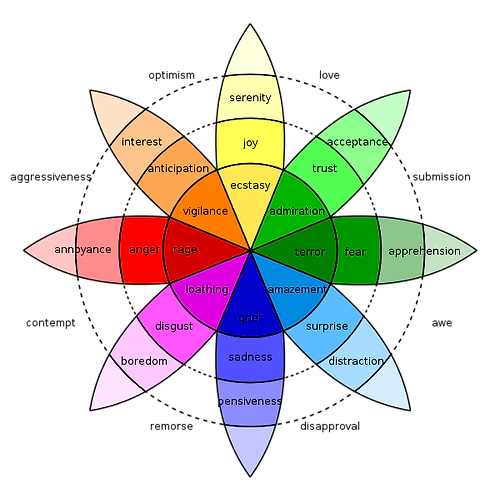

- 8가지 기본 감정 (가장 큰 범주)
1. Joy (기쁨)
2. Trust (신뢰)
3. Fear (공포)
4. Surprise (놀람)
5. Sadness (슬픔)
6. Disgust (혐오)
7. Anger (분노)
8. Anticipation (기대)

- 인사이드 아웃2 감정 
1. Joy (기쁨이)
2. Sadness (슬픔이)
3. Anger (버럭이)
4. Disgust (까칠이)
5. Fear (소심이)
6. Anxiety (불안이) -> Fear의 외곽에 해당
7. Envy (부럽이) -> 복합 감정(슬픔+분노) (기본 감정엔 없음)
8. Embarrassment (당황이) -> 복합 감정 (놀람+슬픔)
9. Ennui (따분이) -> Disgust의 외곽에 해당 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

## Exploratory data analysis
- 데이터셋에는 감정외에도 다양한 단어들 존재함. 

In [18]:
# 데이터 로드
df = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\BRM-emot-submit.csv', index_col=0)
df.head(3)

,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
1,aardvark,6.26,2.21,19,2.41,1.40,22,4.27,1.75,15,...,11,2.55,1.29,11,4.12,1.64,8,4.43,1.99,7
2,abalone,5.30,1.59,20,2.65,1.90,20,4.95,1.79,22,...,12,2.38,1.92,8,5.55,2.21,11,4.36,1.03,11
3,abandon,2.84,1.54,19,3.73,2.43,22,3.32,2.50,22,...,11,3.82,2.14,11,2.77,2.09,13,4.11,2.93,9


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13915 entries, 1 to 13915
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Word        13914 non-null  object 
 1   V.Mean.Sum  13915 non-null  float64
 2   V.SD.Sum    13915 non-null  float64
 3   V.Rat.Sum   13915 non-null  int64  
 4   A.Mean.Sum  13915 non-null  float64
 5   A.SD.Sum    13915 non-null  float64
 6   A.Rat.Sum   13915 non-null  int64  
 7   D.Mean.Sum  13915 non-null  float64
 8   D.SD.Sum    13915 non-null  float64
 9   D.Rat.Sum   13915 non-null  int64  
 10  V.Mean.M    13915 non-null  float64
 11  V.SD.M      13915 non-null  float64
 12  V.Rat.M     13915 non-null  int64  
 13  V.Mean.F    13915 non-null  float64
 14  V.SD.F      13915 non-null  float64
 15  V.Rat.F     13915 non-null  int64  
 16  A.Mean.M    13915 non-null  float64
 17  A.SD.M      13915 non-null  float64
 18  A.Rat.M     13915 non-null  int64  
 19  A.Mean.F    13915 non-null  fl

In [171]:
df.columns

Index(['Word', 'V.Mean.Sum', 'V.SD.Sum', 'V.Rat.Sum', 'A.Mean.Sum', 'A.SD.Sum',
       'A.Rat.Sum', 'D.Mean.Sum', 'D.SD.Sum', 'D.Rat.Sum', 'V.Mean.M',
       'V.SD.M', 'V.Rat.M', 'V.Mean.F', 'V.SD.F', 'V.Rat.F', 'A.Mean.M',
       'A.SD.M', 'A.Rat.M', 'A.Mean.F', 'A.SD.F', 'A.Rat.F', 'D.Mean.M',
       'D.SD.M', 'D.Rat.M', 'D.Mean.F', 'D.SD.F', 'D.Rat.F', 'V.Mean.Y',
       'V.SD.Y', 'V.Rat.Y', 'V.Mean.O', 'V.SD.O', 'V.Rat.O', 'A.Mean.Y',
       'A.SD.Y', 'A.Rat.Y', 'A.Mean.O', 'A.SD.O', 'A.Rat.O', 'D.Mean.Y',
       'D.SD.Y', 'D.Rat.Y', 'D.Mean.O', 'D.SD.O', 'D.Rat.O', 'V.Mean.L',
       'V.SD.L', 'V.Rat.L', 'V.Mean.H', 'V.SD.H', 'V.Rat.H', 'A.Mean.L',
       'A.SD.L', 'A.Rat.L', 'A.Mean.H', 'A.SD.H', 'A.Rat.H', 'D.Mean.L',
       'D.SD.L', 'D.Rat.L', 'D.Mean.H', 'D.SD.H', 'D.Rat.H'],
      dtype='object')

| 컬럼 패턴                                   | 설명                                                               |
|--------------------------------------------|--------------------------------------------------------------------|
| `Word`                                     | 단어(lemma)                                                        |
| `{V,A,D}.Mean.Sum`                         | 전체집단(combined sample)에서의 해당 차원 평균 점수 (1–9 척도)     |
| `{V,A,D}.SD.Sum`                           | 전체집단 해당 차원 평가의 표준편차                                  |
| `{V,A,D}.Rat.Sum`                          | 전체집단 해당 차원에 참여한 평가자(응답자) 수                       |
| `{V,A,D}.Mean.M` / `.SD.M` / `.Rat.M`      | 남성(Male) 참가자만 따로 뽑았을 때의 평균·표준편차·평가자 수      |
| `{V,A,D}.Mean.F` / `.SD.F` / `.Rat.F`      | 여성(Female) 참가자만 따로 뽑았을 때의 평균·표준편차·평가자 수    |
| `{V,A,D}.Mean.Y` / `.SD.Y` / `.Rat.Y`      | 젊은(Young) 참가자(연령 하위 집단)의 평균·표준편차·평가자 수       |
| `{V,A,D}.Mean.O` / `.SD.O` / `.Rat.O`      | 나이든(Old) 참가자(연령 상위 집단)의 평균·표준편차·평가자 수       |
| `{V,A,D}.Mean.L` / `.SD.L` / `.Rat.L`      | 1차 실험(Study 1) 참가자의 평균·표준편차·평가자 수                |
| `{V,A,D}.Mean.H` / `.SD.H` / `.Rat.H`      | 2차 실험(Study 2) 참가자의 평균·표준편차·평가자 수                |

In [172]:
# 전체 집단 V-A-D 평균만 추출
df = df[["Word","V.Mean.Sum","A.Mean.Sum","D.Mean.Sum"]]

# 컬럼명 보기 편하게 변경
df.columns = ["Word","Valence","Arousal","Dominance"]

# df = df.set_index("Word")

In [173]:
df.head()

,Word,Valence,Arousal,Dominance
1,aardvark,6.26,2.41,4.27
2,abalone,5.30,2.65,4.95
3,abandon,2.84,3.73,3.32
4,abandonment,2.63,4.95,2.64
5,abbey,5.85,2.20,5.00


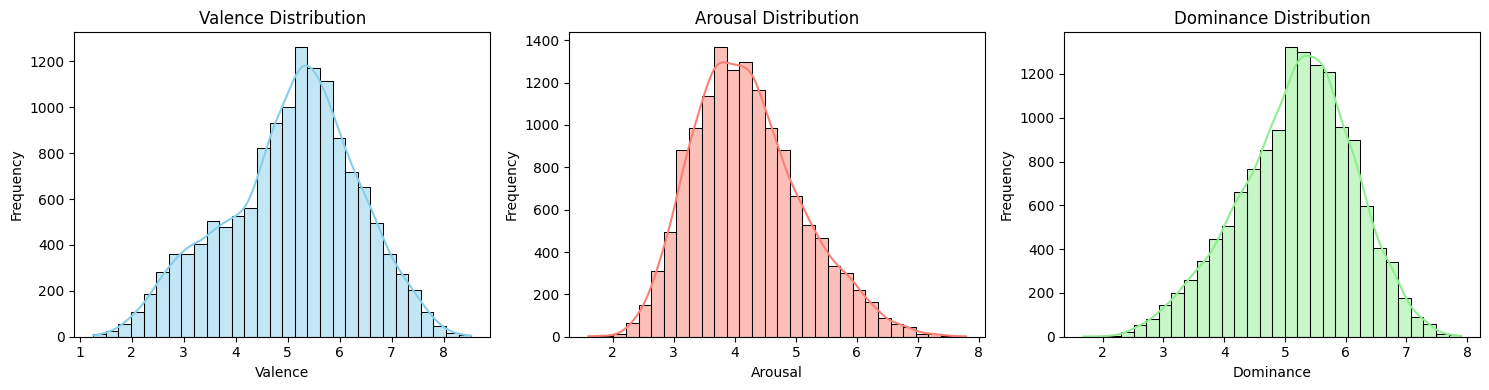

In [136]:
# valence, arousal, dominance 분포 시각화
plt.figure(figsize=(15, 4))

# 1) Valence 분포
plt.subplot(1, 3, 1)
sns.histplot(df['Valence'], kde=True, bins=30, color='skyblue')
plt.title('Valence Distribution')
plt.xlabel('Valence')
plt.ylabel('Frequency')

# 2) Arousal 분포
plt.subplot(1, 3, 2)
sns.histplot(df['Arousal'], kde=True, bins=30, color='salmon')
plt.title('Arousal Distribution')
plt.xlabel('Arousal')
plt.ylabel('Frequency')

# 3) Dominance 분포
plt.subplot(1, 3, 3)
sns.histplot(df['Dominance'], kde=True, bins=30, color='lightgreen')
plt.title('Dominance Distribution')
plt.xlabel('Dominance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

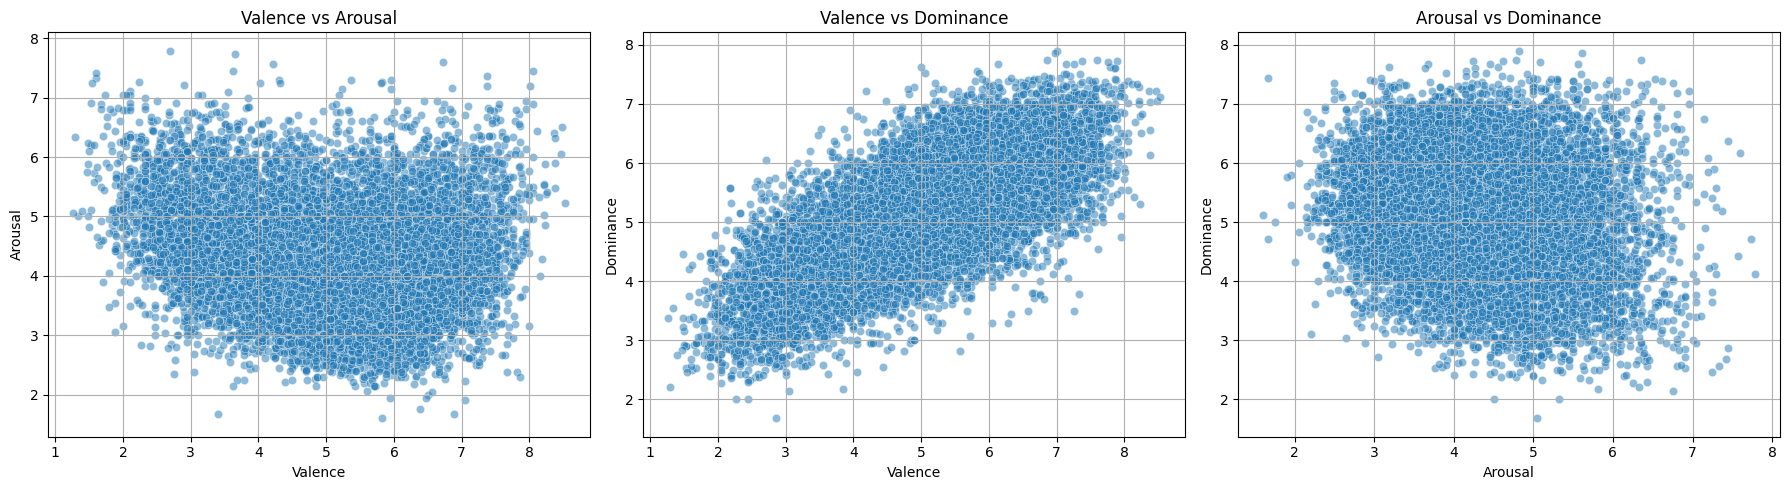

In [137]:
# 산점도 (감정 좌표계)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='Valence', y='Arousal', data=df, alpha=0.5, ax=axes[0])
axes[0].set_title('Valence vs Arousal')
axes[0].grid(True)

sns.scatterplot(x='Valence', y='Dominance', data=df, alpha=0.5, ax=axes[1])
axes[1].set_title('Valence vs Dominance')
axes[1].grid(True)

sns.scatterplot(x='Arousal', y='Dominance', data=df, alpha=0.5, ax=axes[2])
axes[2].set_title('Arousal vs Dominance')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [50]:
# 상관계수 출력
print(df[['Valence', 'Arousal', 'Dominance']].corr())

            Valence   Arousal  Dominance
Valence    1.000000 -0.184826   0.716629
Arousal   -0.184826  1.000000  -0.179992
Dominance  0.716629 -0.179992   1.000000


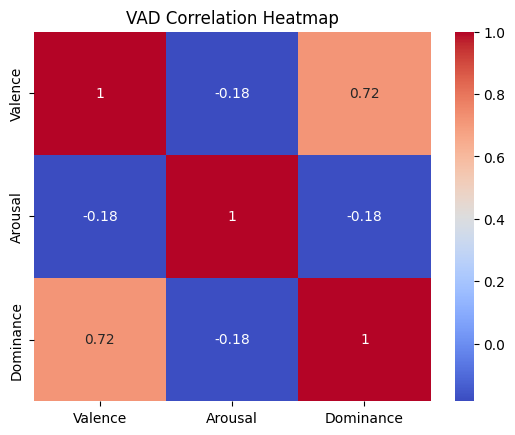

In [51]:
# 히트맵 시각화
sns.heatmap(df[['Valence', 'Arousal', 'Dominance']].corr(), annot=True, cmap='coolwarm')
plt.title('VAD Correlation Heatmap')
plt.show()

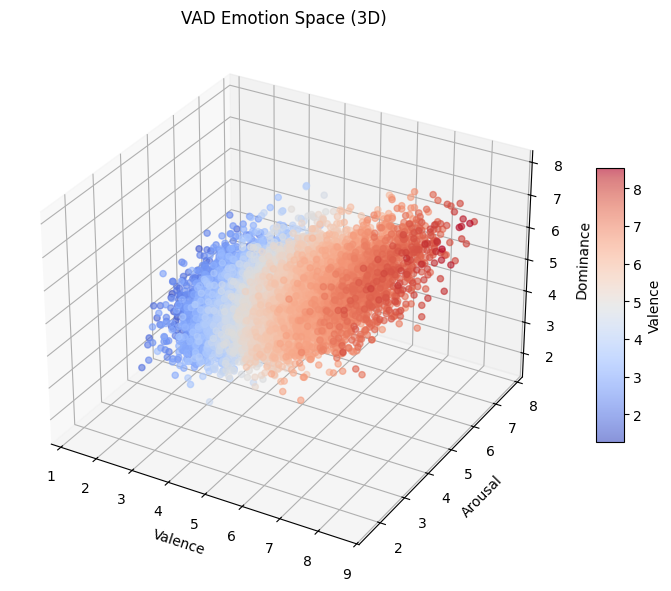

In [49]:
# 3D 산점도
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = df['Valence']
y = df['Arousal']
z = df['Dominance']

# 색상은 Valence로 설정 (원하면 다른 차원으로 바꿔도 됨)
scatter = ax.scatter(x, y, z, c=x, cmap='coolwarm', alpha=0.6)

ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
ax.set_title('VAD Emotion Space (3D)')

# 색상 바 (Valence 기준일 때)
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Valence')

plt.tight_layout()
plt.show()

In [52]:
# 왜도/ 첨도
print("Skewness:")
print(df[['Valence', 'Arousal', 'Dominance']].skew())

print("\nKurtosis:")
print(df[['Valence', 'Arousal', 'Dominance']].kurtosis())

Skewness:
Valence     -0.296985
Arousal      0.504292
Dominance   -0.307706
dtype: float64

Kurtosis:
Valence     -0.344336
Arousal      0.048247
Dominance   -0.137453
dtype: float64


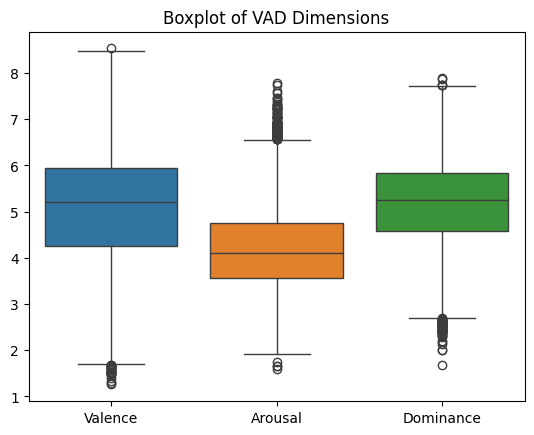

In [53]:
# 이상치 확인
sns.boxplot(data=df[['Valence', 'Arousal', 'Dominance']])
plt.title('Boxplot of VAD Dimensions')
plt.show()

In [54]:
# 가장 긍정적/부정적 단어 상위 10개
print("Top Positive Words:")
print(df.sort_values(by='Valence', ascending=False)[['Word', 'Valence']].head(10))

print("\nTop Negative Words:")
print(df.sort_values(by='Valence', ascending=True)[['Word', 'Valence']].head(10))

Top Positive Words:
            Word  Valence
13283   vacation     8.53
5595   happiness     8.48
5596       happy     8.47
2080   christmas     8.37
5008         fun     8.37
4122   enjoyment     8.37
4473   fantastic     8.36
7245     lovable     8.26
4930        free     8.25
5977         hug     8.23

Top Negative Words:
            Word  Valence
8847   pedophile     1.26
9863      rapist     1.30
254         AIDS     1.33
12661    torture     1.40
7046    leukemia     1.47
8004      murder     1.48
7841    molester     1.48
9794      racism     1.48
5872    homicide     1.50
2014       chemo     1.50


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_36120\747118121.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Valence_Category", order=["Positive", "Neutral", "Negative"], palette="Set2")


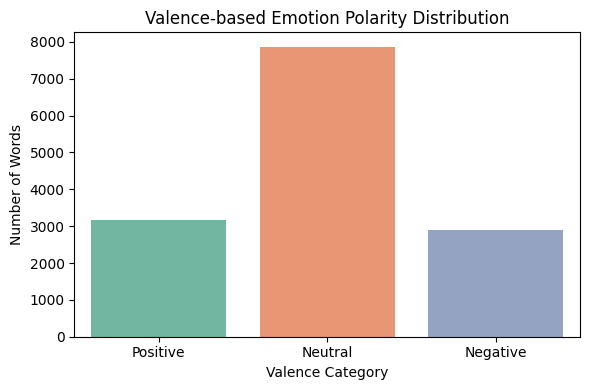

In [194]:
# 긍정/부정/중립 분류
# 분류 함수 정의
def classify_valence(v):
    if v > 6.0:
        return "Positive"
    elif v < 4.0:
        return "Negative"
    else:
        return "Neutral"
    
# 새 컬럼으로 분류 결과 저장
df["Valence_Category"] = df["Valence"].apply(classify_valence)

# 시각화
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Valence_Category", order=["Positive", "Neutral", "Negative"], palette="Set2")
plt.title("Valence-based Emotion Polarity Distribution")
plt.xlabel("Valence Category")
plt.ylabel("Number of Words")
plt.tight_layout()
plt.show()

In [197]:
# 중립인 경우만 필터링해서 리스트 추출
neutral_df = df[df['Valence_Category'] == 'Neutral']

# 필요한 컬럼만 출력
neutral_words = neutral_df[['Word', 'Valence', 'Arousal', 'Dominance']]
print(neutral_words.head()) 

         Word  Valence  Arousal  Dominance
2     abalone     5.30     2.65       4.95
5       abbey     5.85     2.20       5.00
6     abdomen     5.43     3.68       5.15
7   abdominal     4.48     3.50       5.32
10      abide     5.52     3.26       5.33


In [198]:
neutral_df

,Word,Valence,Arousal,Dominance,P_2D_Polar,P_Euclidean,P_Cosine,P_2D_Euclidean,IO2_2D_Polar,IO2_Euclidean,IO2_Cosine,IO2_2D_Euclidean,Valence_Category
2,abalone,5.30,2.65,4.95,anger,anticipation,trust,trust,anxiety,ennui,joy,ennui,Neutral
5,abbey,5.85,2.20,5.00,anger,trust,trust,trust,anxiety,ennui,joy,ennui,Neutral
6,abdomen,5.43,3.68,5.15,anger,anticipation,joy,anticipation,anxiety,ennui,joy,ennui,Neutral
7,abdominal,4.48,3.50,5.32,anger,disgust,trust,disgust,anger,ennui,ennui,ennui,Neutral
10,abide,5.52,3.26,5.33,anger,anticipation,trust,trust,anxiety,ennui,joy,ennui,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907,zipper,5.11,3.73,5.18,anger,anticipation,trust,anticipation,anxiety,ennui,ennui,ennui,Neutral
13909,zodiac,5.55,4.25,4.32,anticipation,anticipation,joy,anticipation,ennui,ennui,joy,ennui,Neutral
13911,zone,4.75,3.78,5.23,anger,anticipation,trust,anticipation,anger,ennui,ennui,ennui,Neutral
13912,zoning,4.65,3.77,4.47,anger,disgust,joy,anticipation,anger,ennui,joy,ennui,Neutral


## 필요한 함수 정의

In [185]:
# 2D Valence-Arousal 각도 기반 
def categorize_emotion_2d(row, labels, center_val=5.0, center_ar=5.0):
    v, a = row.Valence, row.Arousal
    theta = np.degrees(np.arctan2(a - center_ar, v - center_val)) % 360
    sector_size = 360 / len(labels)
    idx = int((theta + sector_size / 2) // sector_size) % len(labels)
    return labels[idx]

In [148]:
# 2D Valence-Arousal 중심만 따로 추출
def extract_va_centroids(centroid_dict_3d):
    return {emotion: [coords[0], coords[1]] for emotion, coords in centroid_dict_3d.items()}

In [149]:
# 2D Valence-Arousal 거리 기반 
def assign_emotion_2d_va(row, centroids_2d):
    v, a = row.Valence, row.Arousal
    target = np.array([v, a])
    min_dist = float('inf')
    best_emotion = None
    for emotion, center in centroids_2d.items():
        dist = np.linalg.norm(target - np.array(center))
        if dist < min_dist:
            min_dist = dist
            best_emotion = emotion
    return best_emotion

In [150]:
# 3D 유클리드 거리 기반 감정 분류 
def assign_emotion_euclidean(row, centroids_3d):
    v, a, d = row.Valence, row.Arousal, row.Dominance
    target = np.array([v, a, d])
    min_dist = float('inf')
    best_emotion = None
    for emotion, center in centroids_3d.items():
        dist = np.linalg.norm(target - np.array(center))
        if dist < min_dist:
            min_dist = dist
            best_emotion = emotion
    return best_emotion

In [151]:
# 3D 코사인 유사도 기반 감정 분류 
def assign_emotion_cosine(row, centroids_3d):
    v, a, d = row.Valence, row.Arousal, row.Dominance
    target_vec = np.array([v, a, d])
    max_similarity = -1
    best_emotion = None
    for emotion, center in centroids_3d.items():
        center_vec = np.array(center)
        cos_sim = dot(target_vec, center_vec) / (norm(target_vec) * norm(center_vec))
        if cos_sim > max_similarity:
            max_similarity = cos_sim
            best_emotion = emotion
    return best_emotion

In [ ]:
# 2D 기반 시각화 
def compare_methods(df, methods, labels, titles=None, figsize=(12, 12), alpha=0.8):

    n = len(methods)
    cols = 2
    rows = (n + 1) // cols
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    width = 2*np.pi / len(labels)
    
    fig = plt.figure(figsize=figsize)
    for i, method in enumerate(methods):
        ax = fig.add_subplot(rows, cols, i+1, projection='polar')
        counts = df[method].value_counts().reindex(labels, fill_value=0).values
        ax.bar(angles, counts, width=width, bottom=0.0, alpha=alpha)
        ax.set_xticks(angles)
        ax.set_xticklabels(labels, fontsize=10)
        ax.set_yticklabels([])
        title = titles[i] if titles else method
        ax.set_title(title, va='bottom')
    
    plt.tight_layout()
    plt.show()

## 1. Plutchick의 8가지 기본 감정으로 단어 집합 분류

In [174]:
# Plutchik 8 기본 감정 전형어 좌표
plutchik_labels = [
    "joy", "trust", "fear", "surprise",
    "sadness", "disgust", "anger", "anticipation"
]

In [175]:
# plutchik_labels의 V.A.D 값 확인
# Word 컬럼에서 해당 단어들만 필터링
vad_representatives = df[df['Word'].isin(plutchik_labels)][['Word', 'Valence', 'Arousal', 'Dominance']]

print(vad_representatives)

               Word  Valence  Arousal  Dominance
418           anger     2.50     5.93       5.14
472    anticipation     5.26     5.39       5.53
3569        disgust     3.32     5.00       4.84
4524           fear     2.93     6.14       3.32
6722            joy     8.21     5.55       7.00
10587       sadness     2.40     2.81       3.84
12138      surprise     7.44     6.57       5.17
12862         trust     7.24     4.30       6.95


In [176]:
# Plutchik 8 감정의 대표 VAD 값 
plutchik_centroids = {
    "joy":         [8.21, 5.55, 7.00],
    "trust":       [7.24, 4.30, 6.95],
    "fear":        [2.93, 6.14, 3.32],
    "surprise":    [7.44, 6.57, 5.17],
    "sadness":     [2.40, 2.81, 3.84],
    "disgust":     [3.32, 5.00, 4.84],
    "anger":       [2.50, 5.93, 5.14],
    "anticipation":[5.26, 5.39, 5.53]
}

In [177]:
# 2D Valence-Arousal 중심만 따로 추출
plutchik_centroids_2d = extract_va_centroids(plutchik_centroids)

In [178]:
# 감정 분류 적용
df["P_2D_Polar"] = df.apply(lambda row: categorize_emotion_2d(row, plutchik_labels), axis=1)
df["P_Euclidean"] = df.apply(lambda row: assign_emotion_euclidean(row, plutchik_centroids), axis=1)
df["P_Cosine"] = df.apply(lambda row: assign_emotion_cosine(row, plutchik_centroids), axis=1)
df["P_2D_Euclidean"] = df.apply(lambda row: assign_emotion_2d_va(row, plutchik_centroids_2d), axis=1)

In [179]:
df.head(3)

,Word,Valence,Arousal,Dominance,P_2D_Polar,P_Euclidean,P_Cosine,P_2D_Euclidean
1,aardvark,6.26,2.41,4.27,anticipation,anticipation,trust,trust
2,abalone,5.30,2.65,4.95,anger,anticipation,trust,trust
3,abandon,2.84,3.73,3.32,disgust,sadness,disgust,sadness


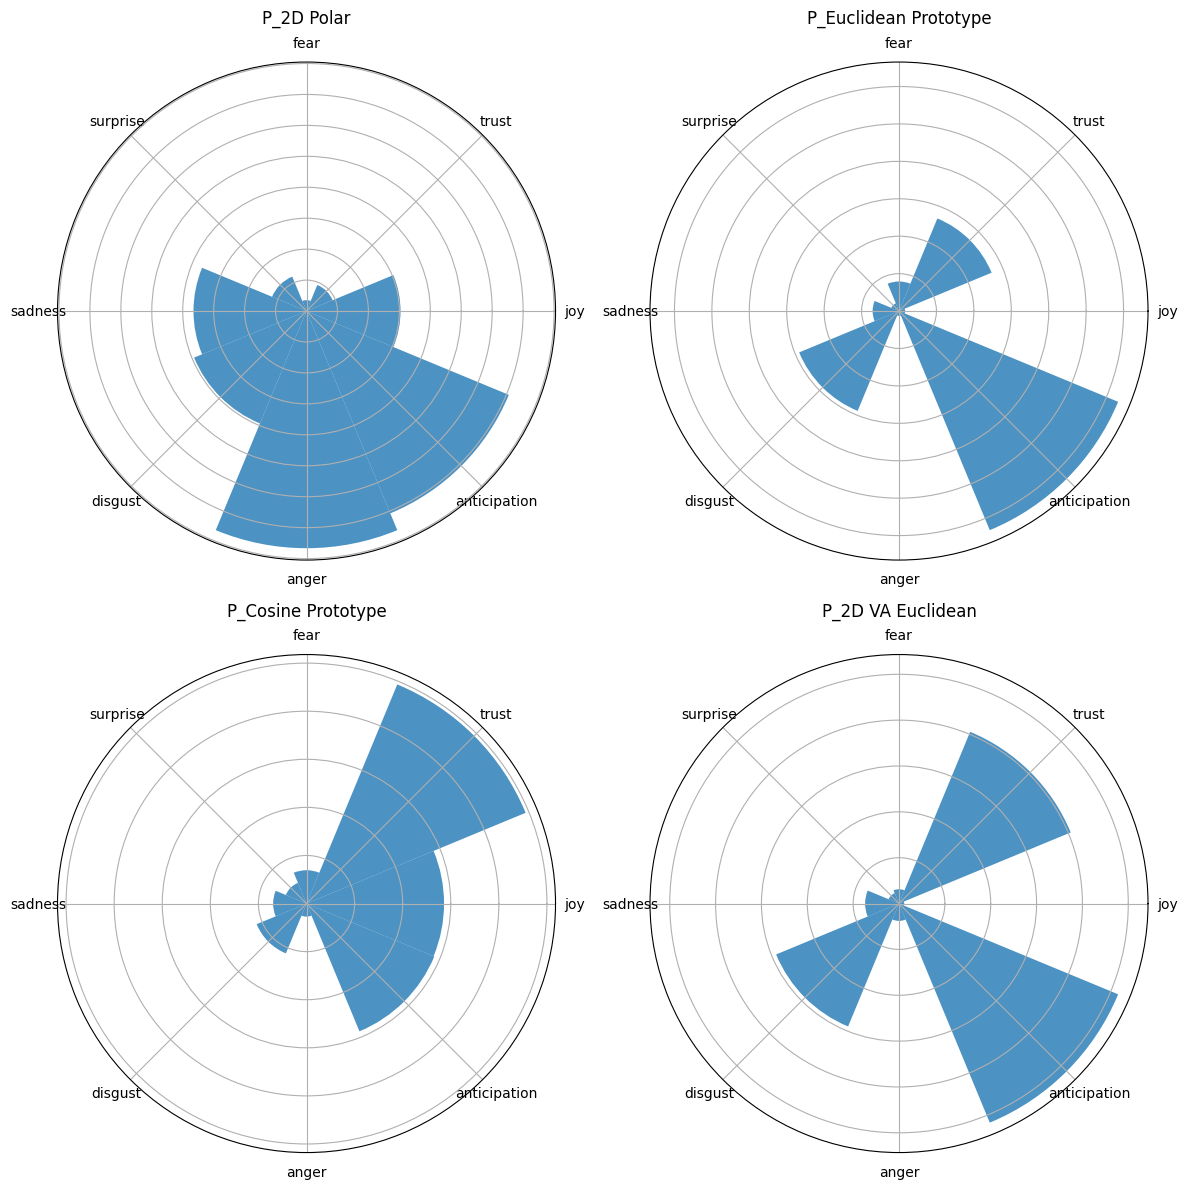

In [ ]:
# 4가지 경우 비교 
methods = ['P_2D_Polar', 'P_Euclidean', 'P_Cosine', 'P_2D_Euclidean']
titles  = ['P_2D Polar', 'P_Euclidean Prototype', 'P_Cosine Prototype', '2D VA Euclidean']

compare_methods(df, methods, plutchik_labels, titles)

## 2. 인사이드 아웃 2 기반 (Joy, Sadness, Anger, Disgust, Fear, Anxiety, Envy, Embarrassment, Ennui)

1. Joy (기쁨이)
2. Sadness (슬픔이)
3. Anger (버럭이)
4. Disgust (까칠이)
5. Fear (소심이)
6. **Anxiety (불안이) -> Fear의 외곽에 해당 -> 인사이드 아웃2의 중심 감정** 
7. Envy (부럽이) -> 복합 감정(슬픔+분노) (기본 감정엔 없음)
8. Embarrassment (당황이) -> 복합 감정 (놀람+슬픔)
9. Ennui (따분이) -> Disgust의 외곽에 해당 

------------

In [161]:
# insideout2 의 감정 라벨 정의 
insideout2_labels = [
    "joy", "envy", "fear", "embarrassment",
    "sadness", "disgust", "anger", "anxiety", 'ennui'
]

In [162]:
# insideout2_labels의 V.A.D 값 확인
# Word 컬럼에서 해당 단어들만 필터링
vad_representatives = df[df['Word'].isin(insideout2_labels)][['Word', 'Valence', 'Arousal', 'Dominance']]

print(vad_representatives)

                Word  Valence  Arousal  Dominance
418            anger     2.50     5.93       5.14
484          anxiety     2.38     4.78       3.39
3569         disgust     3.32     5.00       4.84
4031   embarrassment     2.72     5.45       2.92
4129           ennui     4.13     3.26       4.70
4167            envy     3.05     4.35       3.16
4524            fear     2.93     6.14       3.32
6722             joy     8.21     5.55       7.00
10587        sadness     2.40     2.81       3.84


In [187]:
#  insideout2 감정의 VAD 값 
insideout2_centroids = {
    "joy":           [8.21, 5.55, 7.00],
    "anxiety":       [2.38, 4.78, 3.39],
    "fear":          [2.93, 6.14, 3.32],
    "envy":          [3.05, 6.57, 5.17],
    "sadness":       [2.40, 2.81, 3.84],
    "disgust":       [3.32, 5.00, 4.84],
    "anger":         [2.50, 5.93, 5.14],
    "embarrassment": [2.72, 5.45, 2.92],
    'ennui':         [4.13, 3.26, 4.70]
}

In [188]:
# 2D Valence-Arousal 중심만 따로 추출
insideout2_centroids_2d = extract_va_centroids(insideout2_centroids)

In [144]:
'''
# Plutchik ->  InsideOut2 브릿지 재분류 함수
# Plutchik에서 처리해야할 감정: Trust, Anticipation 
# Insideout2에서 처리해야할 감정: Embarrassment, Ennui, Anxiety, Envy

def bridge_to_inside_out2(row):
    label = row.PlutchikEmotion
    v, a, d = row.Valence, row.Arousal, row.Dominance

    # Anticipation은 긍정적 기대감이므로 Joy로 병합
    if label in ("Trust", "Anticipation"):
        return "Joy"

    # Surprise 영역 중 중립~긍정 + 높은 각성 + 낮은 통제감 -> Embarrassment
    if label == 'Surprise' and 4 <= v <= 6 and a > 5 and d < 5:
        return 'Embarrassment'
    
    # Surprise 영역 중 긍정적 반응 (높은 v) -> Envy
    if label == 'Surprise' and v > 6 and a > 5 and d < 5:
        return 'Envy'
    
    # Disgust 영역 중 부정 + 낮은 각성 + 낮은 통제감 -> Ennui
    if label == 'Disgust' and v < 5 and a < 4 and d < 5:
        return 'Ennui'
    
    # Fear 영역 중 각성 높고 통제감 낮으면 Anxiety
    if label == "Fear" and a > 6 and d < 5:
        label = "Anxiety"

    # Anxiety 중에서도 긍정성이 높으면 Envy
    if label == "Anxiety" and v > 6:
        label = "Envy"
    # 나머지는 원래 Plutchik 라벨 그대로
    return label
'''

'\n# Plutchik ->  InsideOut2 브릿지 재분류 함수\n# Plutchik에서 처리해야할 감정: Trust, Anticipation \n# Insideout2에서 처리해야할 감정: Embarrassment, Ennui, Anxiety, Envy\n\ndef bridge_to_inside_out2(row):\n    label = row.PlutchikEmotion\n    v, a, d = row.Valence, row.Arousal, row.Dominance\n\n    # Anticipation은 긍정적 기대감이므로 Joy로 병합\n    if label in ("Trust", "Anticipation"):\n        return "Joy"\n\n    # Surprise 영역 중 중립~긍정 + 높은 각성 + 낮은 통제감 -> Embarrassment\n    if label == \'Surprise\' and 4 <= v <= 6 and a > 5 and d < 5:\n        return \'Embarrassment\'\n    \n    # Surprise 영역 중 긍정적 반응 (높은 v) -> Envy\n    if label == \'Surprise\' and v > 6 and a > 5 and d < 5:\n        return \'Envy\'\n    \n    # Disgust 영역 중 부정 + 낮은 각성 + 낮은 통제감 -> Ennui\n    if label == \'Disgust\' and v < 5 and a < 4 and d < 5:\n        return \'Ennui\'\n    \n    # Fear 영역 중 각성 높고 통제감 낮으면 Anxiety\n    if label == "Fear" and a > 6 and d < 5:\n        label = "Anxiety"\n\n    # Anxiety 중에서도 긍정성이 높으면 Envy\n    if label == "Anxiety" an

In [189]:
# 분류 적용
df["IO2_2D_Polar"] = df.apply(lambda row: categorize_emotion_2d(row, insideout2_labels), axis=1)
df["IO2_Euclidean"] = df.apply(lambda row: assign_emotion_euclidean(row, insideout2_centroids), axis=1)
df["IO2_Cosine"] = df.apply(lambda row: assign_emotion_cosine(row, insideout2_centroids), axis=1)
df["IO2_2D_Euclidean"] = df.apply(lambda row: assign_emotion_2d_va(row, insideout2_centroids_2d), axis=1)

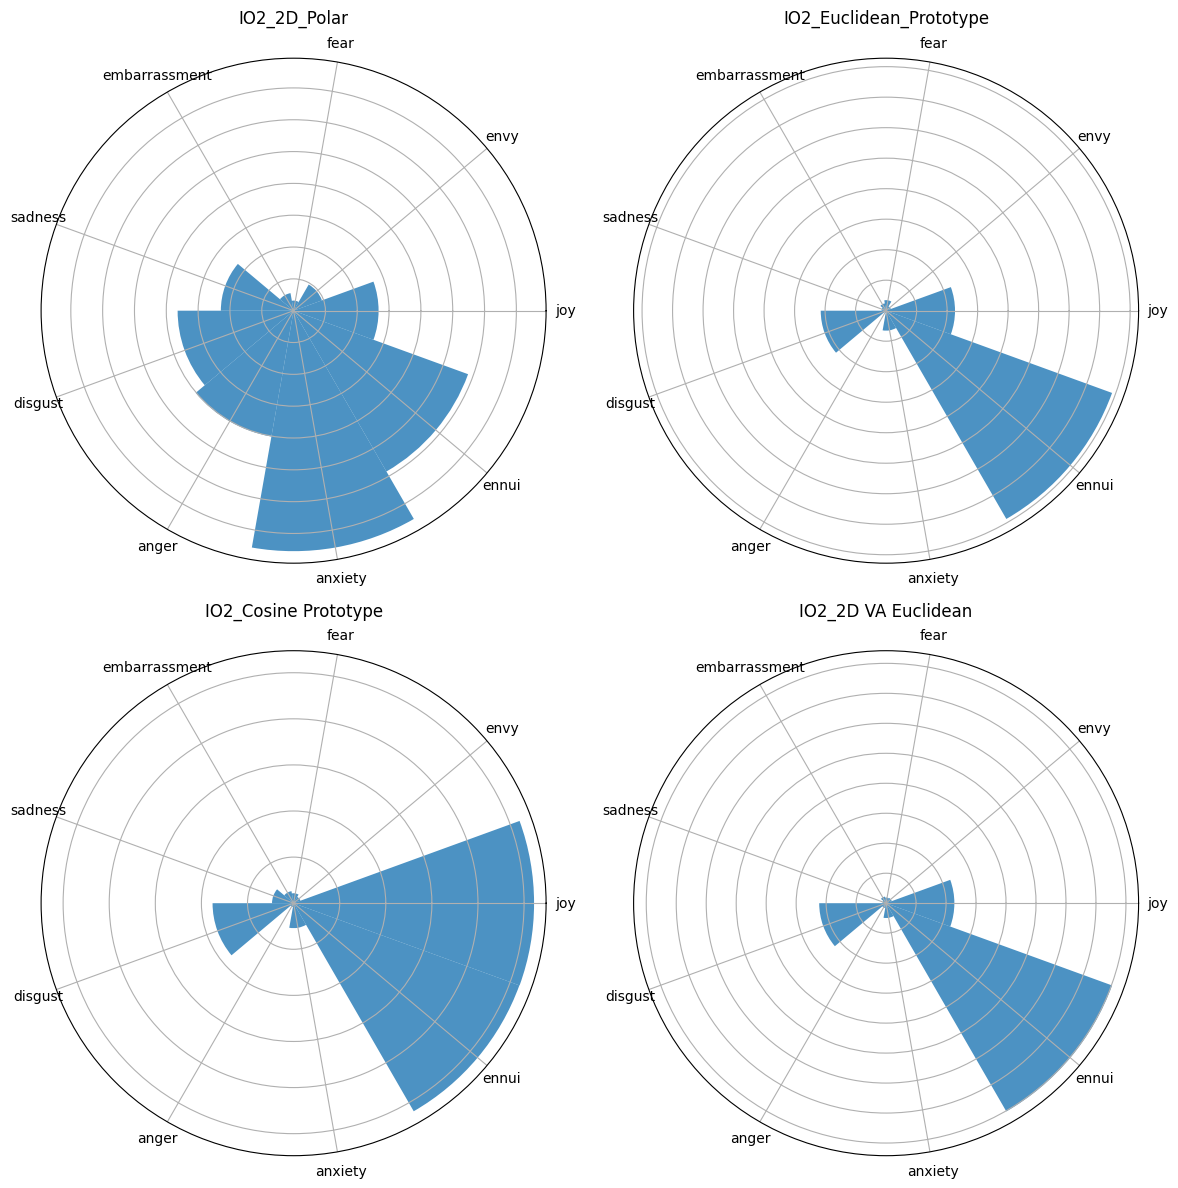

In [192]:
# 4가지 경우 비교 
methods = ['IO2_2D_Polar', 'IO2_Euclidean', 'IO2_Cosine', 'IO2_2D_Euclidean']
titles  = ['IO2_2D_Polar', 'IO2_Euclidean_Prototype', 'IO2_Cosine Prototype', 'IO2_2D VA Euclidean']

compare_methods(df, methods, insideout2_labels, titles)

In [193]:
df.head()

,Word,Valence,Arousal,Dominance,P_2D_Polar,P_Euclidean,P_Cosine,P_2D_Euclidean,IO2_2D_Polar,IO2_Euclidean,IO2_Cosine,IO2_2D_Euclidean
1,aardvark,6.26,2.41,4.27,anticipation,anticipation,trust,trust,anxiety,ennui,joy,ennui
2,abalone,5.30,2.65,4.95,anger,anticipation,trust,trust,anxiety,ennui,joy,ennui
3,abandon,2.84,3.73,3.32,disgust,sadness,disgust,sadness,disgust,sadness,disgust,sadness
4,abandonment,2.63,4.95,2.64,sadness,fear,fear,disgust,disgust,embarrassment,embarrassment,anxiety
5,abbey,5.85,2.20,5.00,anger,trust,trust,trust,anxiety,ennui,joy,ennui


## 3. 저장

In [205]:
df_labeled = df.copy()
df_labeled.to_csv('vad_lexicon_labeled.csv', index=False)

## 4. go-emotion dataset으로 확인해보기
- vad 사전에는 감정 외 단어들도 많으므로 감정 단어들만 들어있는 데이터셋으로 확인

In [3]:
vad = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\vad_lexicon_labeled.csv')

In [202]:
go_emo = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\go_emotions_dataset.csv')
go_emo

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,ee6pagw,Everyone likes [NAME].,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
211221,ef28nod,Well when you’ve imported about a gazillion of...,False,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
211222,ee8hse1,That looks amazing,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211223,edrhoxh,The FDA has plenty to criticize. But like here...,False,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
emotions = set(go_emo.columns[3:])
emotions

{'admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'neutral',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise'}

In [210]:
# vad 사전에서 위의 감정들이 가지는 값 확인
# 확인할 단어 리스트 (소문자)
words = {
    'admiration','amusement','anger','annoyance','approval','caring','confusion',
    'curiosity','desire','disappointment','disapproval','disgust','embarrassment',
    'excitement','fear','gratitude','grief','joy','love','nervousness','neutral',
    'optimism','pride','realization','relief','remorse','sadness','surprise'
}

# 소문자로 통일 후 필터링
vad['Word'] = vad['Word'].str.lower()
filtered = vad[vad['Word'].isin(words)].copy()

# V-A-D 값만 출력
print(filtered)

                 Word  Valence  Arousal  Dominance    P_2D_Polar  \
151        admiration     7.58     5.52       6.11           joy   
386         amusement     7.00     4.82       6.59           joy   
417             anger     2.50     5.93       5.14       sadness   
441         annoyance     2.95     4.10       3.45       disgust   
540          approval     6.75     3.52       6.63  anticipation   
2551        confusion     3.32     4.64       3.08       sadness   
3007        curiosity     6.37     5.90       6.21         trust   
3340           desire     7.05     6.20       6.07         trust   
3515   disappointment     2.79     4.90       4.08       sadness   
3516      disapproval     3.40     4.23       5.26       disgust   
3568          disgust     3.32     5.00       4.84       sadness   
4030    embarrassment     2.72     5.45       2.92       sadness   
4292       excitement     7.62     6.21       6.33         trust   
4523             fear     2.93     6.14       3.

In [213]:
filtered["P_2D_Polar"] = filtered.apply(lambda row: categorize_emotion_2d(row, plutchik_labels), axis=1)
filtered["P_Euclidean"] = filtered.apply(lambda row: assign_emotion_euclidean(row, plutchik_centroids), axis=1)
filtered["P_Cosine"] = filtered.apply(lambda row: assign_emotion_cosine(row, plutchik_centroids), axis=1)
filtered["P_2D_Euclidean"] = filtered.apply(lambda row: assign_emotion_2d_va(row, plutchik_centroids_2d), axis=1)

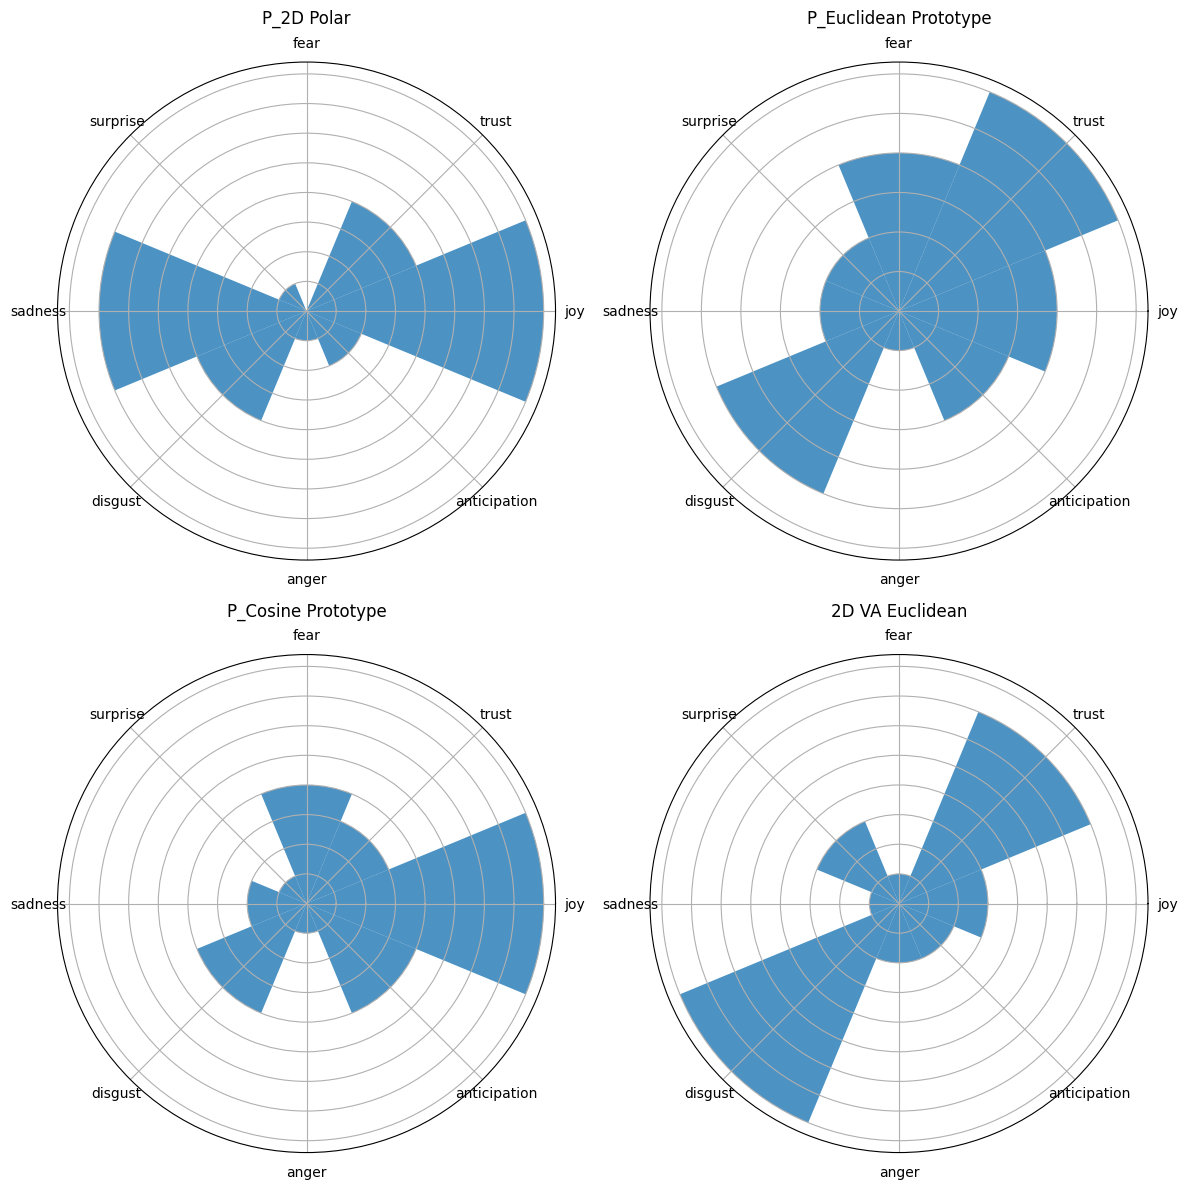

In [214]:
# 4가지 경우 비교 
methods = ['P_2D_Polar', 'P_Euclidean', 'P_Cosine', 'P_2D_Euclidean']
titles  = ['P_2D Polar', 'P_Euclidean Prototype', 'P_Cosine Prototype', '2D VA Euclidean']

compare_methods(filtered, methods, plutchik_labels, titles)

In [211]:
filtered["IO2_2D_Polar"] = filtered.apply(lambda row: categorize_emotion_2d(row, insideout2_labels), axis=1)
filtered["IO2_Euclidean"] = filtered.apply(lambda row: assign_emotion_euclidean(row, insideout2_centroids), axis=1)
filtered["IO2_Cosine"] = filtered.apply(lambda row: assign_emotion_cosine(row, insideout2_centroids), axis=1)
filtered["IO2_2D_Euclidean"] = filtered.apply(lambda row: assign_emotion_2d_va(row, insideout2_centroids_2d), axis=1)

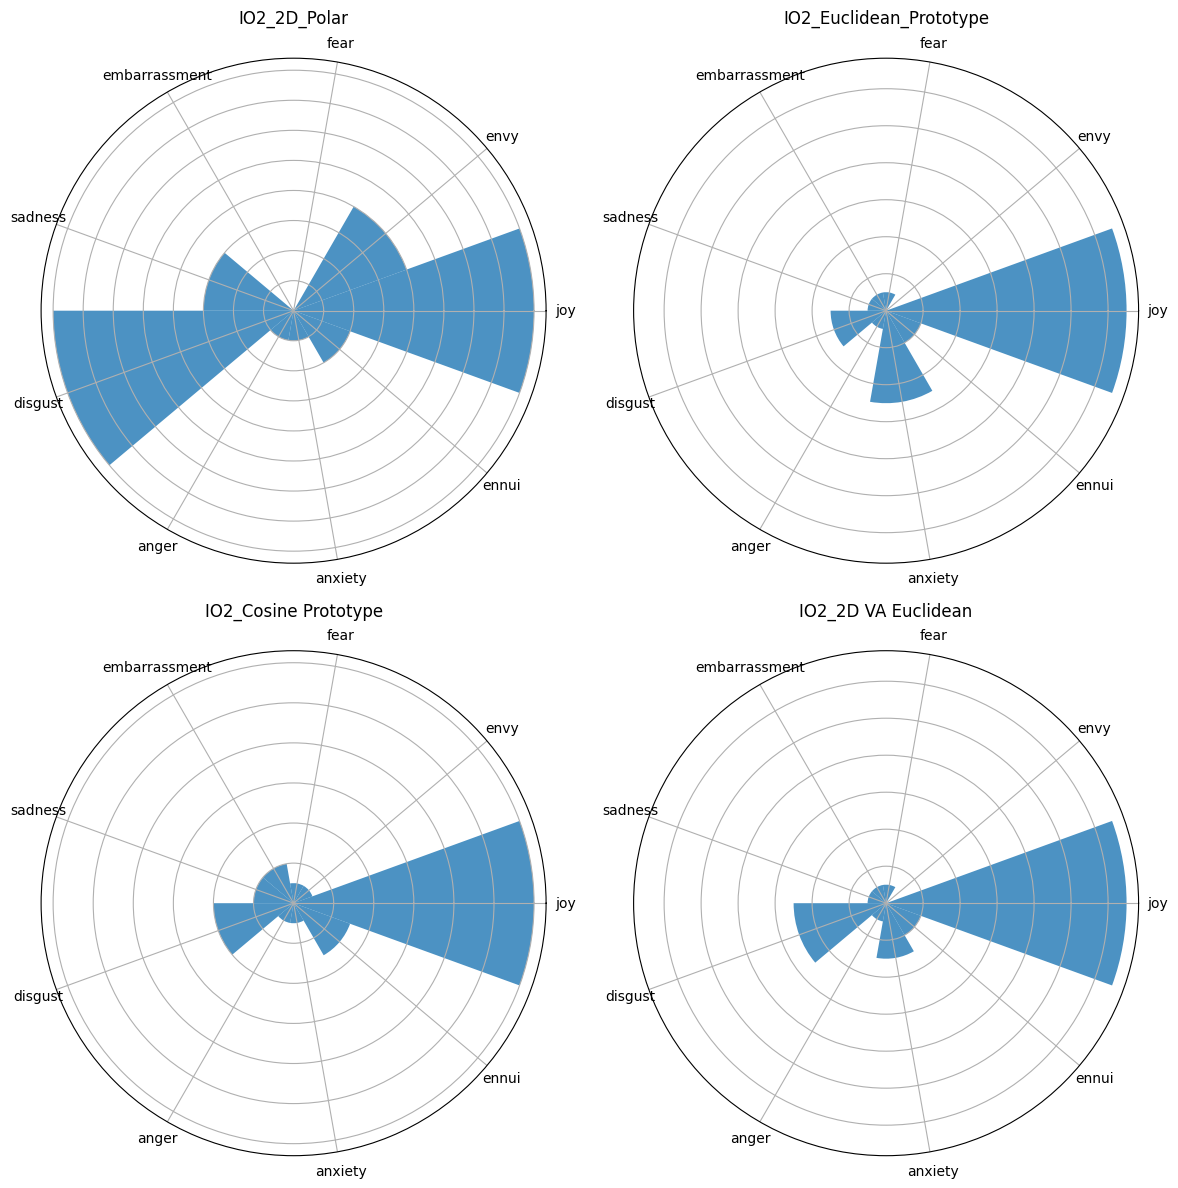

In [212]:
# 4가지 경우 비교 
methods = ['IO2_2D_Polar', 'IO2_Euclidean', 'IO2_Cosine', 'IO2_2D_Euclidean']
titles  = ['IO2_2D_Polar', 'IO2_Euclidean_Prototype', 'IO2_Cosine Prototype', 'IO2_2D VA Euclidean']

compare_methods(filtered, methods, insideout2_labels, titles)

## 5. 한글 사전 버전으로 만들기

In [215]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached chardet-3.0.4-py2.py3-none-any.whl.metadata (3.2 kB)
Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------------------------------- ------- 1.0/1.3 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17519 sha256=b5f3effdcc619f842ac6483e3b577d3eba5e15c8853f5513f2f5655dc27932b2
  Stored in directory: c:\users\wooll\appdata\local\pip\cache\wheels\39\17\6f\66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uni

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.2.7 requires httpx>=0.25.0, but you have httpx 0.13.3 which is incompatible.


In [21]:
from googletrans import Translator
import time
import re

In [13]:
translator = Translator()

In [14]:
print(translator.translate("activity", src="en", dest="ko").text)

활동


In [15]:
def translate_korean(text):
    try:
        time.sleep(0.5)  # 너무 빠른 요청 방지
        return translator.translate(text, src='en', dest='ko').text
    except Exception as e:
        print(f"'{text}' 번역 실패: {e}")
        return text  # 실패 시 원래 텍스트 유지

In [16]:
df_ko = vad.copy()
df_ko['Word'] = vad['Word'].apply(translate_korean)

'petitioner' 번역 실패: the JSON object must be str, bytes or bytearray, not NoneType


In [17]:
# 확인
df_ko.head()

,Word,Valence,Arousal,Dominance,P_2D_Polar,P_Euclidean,P_Cosine,P_2D_Euclidean,IO2_2D_Polar,IO2_Euclidean,IO2_Cosine,IO2_2D_Euclidean,Valence_Category
0,Aardvark,6.26,2.41,4.27,anticipation,anticipation,trust,trust,anxiety,ennui,joy,ennui,Positive
1,전복,5.30,2.65,4.95,anger,anticipation,trust,trust,anxiety,ennui,joy,ennui,Neutral
2,버리다,2.84,3.73,3.32,disgust,sadness,disgust,sadness,disgust,sadness,disgust,sadness,Negative
3,포기,2.63,4.95,2.64,sadness,fear,fear,disgust,disgust,embarrassment,embarrassment,anxiety,Negative
4,대사원,5.85,2.20,5.00,anger,trust,trust,trust,anxiety,ennui,joy,ennui,Neutral


In [22]:
untranslated_df = df_ko[df_ko['Word'].apply(lambda x: bool(re.search(r'[a-zA-Z]', x)))]
print(untranslated_df[['Word', 'Valence', 'Arousal', 'Dominance']].head(20))
print(f"총 {len(untranslated_df)}개 단어가 번역되지 않았습니다.")

             Word  Valence  Arousal  Dominance
0        Aardvark     6.26     2.41       4.27
308       Allegro     5.00     3.89       5.36
382         Amuck     4.00     4.41       3.74
474   antigravity     5.74     5.10       3.77
817    Backgammon     5.60     2.06       4.83
868        Ballsy     4.90     5.29       5.88
871           BAM     5.05     3.96       4.90
886      Banister     5.42     2.55       5.83
986            BE     6.18     3.43       5.50
1046        Belay     5.50     3.43       4.72
1107         Bide     4.50     3.61       5.41
1110       BIGGIE     5.32     3.76       5.36
1113        BIGOT     2.75     5.37       3.12
1127        Bimbo     3.10     3.52       4.84
1301         Bode     4.71     4.00       4.90
1308     Bogeyman     3.81     4.67       3.69
1332      Bonkers     4.95     5.08       4.29
1363   Bootlegger     5.56     4.85       5.56
1367          BOP     5.63     3.95       5.40
1418  Boysenberry     5.95     3.19       5.80
총 223개 단어가 번역

In [23]:
untranslated_words = untranslated_df['Word'].tolist()
translated_map_retry = {}

In [24]:
# 번역 재시도 
for word in untranslated_words:
    try:
        time.sleep(1)  # 요청 제한 우회
        translated = translator.translate(word, src='en', dest='ko').text
        translated_map_retry[word] = translated
    except Exception as e:
        print(f"❌ 번역 실패: {word} → {e}")
        translated_map_retry[word] = word  # 실패 시 원래 단어 유지

❌ 번역 실패: Roadrunner → the JSON object must be str, bytes or bytearray, not NoneType


In [27]:
# 번역 결과와 원래 단어가 같은 경우 → 실패로 간주
failed_words = [word for word, result in translated_map_retry.items() if word == result]

print(f"\n❌ 총 {len(failed_words)}개 단어가 번역되지 않았습니다.")
print(failed_words[:20])  # 앞에서 20개만 예시 출력


❌ 총 213개 단어가 번역되지 않았습니다.
['Aardvark', 'Allegro', 'Amuck', 'antigravity', 'Backgammon', 'Ballsy', 'BAM', 'Banister', 'BE', 'Belay', 'Bide', 'BIGGIE', 'BIGOT', 'Bimbo', 'Bode', 'Bogeyman', 'Bonkers', 'Bootlegger', 'BOP', 'Boysenberry']


In [28]:
# 수동 번역
pd.DataFrame(failed_words, columns=["Word"]).to_csv("번역_실패_리스트.csv", index=False)

In [ ]:
# csv 파일로 저장 
df_ko.to_csv("vad_lexicon_labeled_ko.csv", index=False)